Análisis de Sentimientos en ITSM usando Stanza

Fuente: https://www.kaggle.com/datasets/tobiasbueck/capterra-reviews
Autoría: Ana Ndongo (24/01/2024)

Objetivo:
Evaluar diferencias entre dos datasets relacionados para decidir cuál utilizar como base para un análisis de sentimientos.
Comparar y analizar comentarios del proyecto ZooKeeper (Jira).

Nota sobre el dataset:
Este dataset incluye columnas derivadas como Benchmark_results_of_politeness y Benchmark_results_of_sentiment,
generadas previamente mediante herramientas de análisis de sentimientos y cortesía.

Dado que el objetivo del ejercicio es analizar y visualizar sentimientos, se parte de estas métricas ya calculadas
para centrarse en los resultados y su interpretación, en lugar de en la generación de las mismas.

In [215]:
import pandas as pd
import chardet
from difflib import unified_diff

In [216]:
# Cargar archivos
path_excel = '/content/sample_data/ZooKeeper_Project_Dataset.xlsx'
path_csv = '/content/sample_data/data_results.csv'

df1 = pd.read_excel(path_excel)  # Dataset RAW
df2 = pd.read_csv(path_csv, encoding='MacRoman')  # Dataset procesado

# Resumen inicial
print(f"Columnas comunes: {set(df1.columns).intersection(df2.columns)}")
print(f"Tamaño del Excel: {df1.shape}, CSV: {df2.shape}")

Columnas comunes: {'Comment', 'Benchmark_results_of_politeness', 'Benchmark_results_of_sentiment'}
Tamaño del Excel: (13644, 3), CSV: (13644, 8)


In [217]:
# Verificar igualdad en columnas clave
for col in ['Comment', 'Benchmark_results_of_politeness', 'Benchmark_results_of_sentiment']:
    iguales = df1[col].equals(df2[col])
    print(f"¿'{col}' es igual en ambos datasets?: {iguales}")
'''
¿'Comment' es igual en ambos datasets?: False
¿'Benchmark_results_of_politeness' es igual en ambos datasets?: True
¿'Benchmark_results_of_sentiment' es igual en ambos datasets?: True

Se profundiza un poco más en Comment
'''

¿'Comment' es igual en ambos datasets?: False
¿'Benchmark_results_of_politeness' es igual en ambos datasets?: True
¿'Benchmark_results_of_sentiment' es igual en ambos datasets?: True


"\n¿'Comment' es igual en ambos datasets?: False\n¿'Benchmark_results_of_politeness' es igual en ambos datasets?: True\n¿'Benchmark_results_of_sentiment' es igual en ambos datasets?: True\n\nSe profundiza un poco más en Comment\n"

In [218]:
# Limpieza y normalización para la columna Comment
df1['Comment'] = df1['Comment'].str.replace(r'(_x000D_|\n)', '', regex=True).str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)
df2['Comment'] = df2['Comment'].str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)

In [219]:
# Comparación después de limpiar
print(f"¿Comentarios iguales tras normalización?: {df1['Comment'].equals(df2['Comment'])}")
'''
Se siguen detectando diferencias
'''

¿Comentarios iguales tras normalización?: False


'\nSe siguen detectando diferencias\n'

In [220]:
# Mostrar primera diferencia significativa
for i, (c1, c2) in enumerate(zip(df1['Comment'], df2['Comment'])):
    if c1 != c2:
        print(f"Diferencia en fila {i}:\n" + '\n'.join(unified_diff(c1.splitlines(), c2.splitlines())))
        break
'''
Conclusión: Se usará el Excel como base (RAW) por ser el dataset más completo y adecuado para este análisis.
Se hace este ejercicio para ratificar la información con la que vamos a trabajar
'''

Diferencia en fila 0:
--- 

+++ 

@@ -1 +1 @@

-bq. on 2011-05-20 04:15:05, benjamin reed wrote:bq. > src/c/include/zookeeper.h, line 1119bq. > <https://reviews.apache.org/r/739/diff/4/?file=19416#file19416line1119>bq. >bq. > it isn't clear to me that we should expose check outside of a multitransaction.that's a valid point. i did it for completeness, but there's really no need to have a check op outside a multi op. it would clean up the code as well if i removed it. i'll try to get that done tonight as well.bq. on 2011-05-20 04:15:05, benjamin reed wrote:bq. > src/java/main/org/apache/zookeeper/transaction.java, line 57bq. > <https://reviews.apache.org/r/739/diff/4/?file=19425#file19425line57>bq. >bq. > should we also have an asynchronous version?agreed. ted's created a new jira case for this.bq. on 2011-05-20 04:15:05, benjamin reed wrote:bq. > src/java/main/org/apache/zookeeper/zookeeper.java, line 801bq. > <https://reviews.apache.org/r/739/diff/4/?file=19427#file19427line801>bq. >b

'\nConclusión: Se usará el Excel como base (RAW) por ser el dataset más completo y adecuado para este análisis.\nSe hace este ejercicio para ratificar la información con la que vamos a trabajar\n'

In [221]:
#--- ANALISIS INICIAL DE CONTENIDO DEL DATASET ---#
print(f"Número de filas: {df1.shape[0]}")
print(f"Número de columnas: {df1.shape[1]}")
print("Nombres de las columnas:", df1.columns.tolist())
print("\nInformación del dataset:")
print(df1.info())
print("\nValores nulos por columna:")
print(df1.isnull().sum())
print("\n¿Hay columnas duplicadas?", df1.columns.duplicated().any())
print("\nNúmero de filas duplicadas:", df1.duplicated().sum())

Número de filas: 13644
Número de columnas: 3
Nombres de las columnas: ['Comment', 'Benchmark_results_of_politeness', 'Benchmark_results_of_sentiment']

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13644 entries, 0 to 13643
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Comment                          13610 non-null  object 
 1   Benchmark_results_of_politeness  13644 non-null  object 
 2   Benchmark_results_of_sentiment   13644 non-null  float64
dtypes: float64(1), object(2)
memory usage: 319.9+ KB
None

Valores nulos por columna:
Comment                            34
Benchmark_results_of_politeness     0
Benchmark_results_of_sentiment      0
dtype: int64

¿Hay columnas duplicadas? False

Número de filas duplicadas: 244


In [222]:
# Identificación de tipos de columnas
print("\nColumnas categóricas:", df1.select_dtypes(include=['object']).columns.tolist())
print("\nColumnas numéricas:", df1.select_dtypes(include=['number']).columns.tolist())


Columnas categóricas: ['Comment', 'Benchmark_results_of_politeness']

Columnas numéricas: ['Benchmark_results_of_sentiment']


In [223]:
# Análisis de valores únicos y distribución
print("\nValores únicos por columna:")
for col in df1.columns:
    print(f"{col}: {df1[col].nunique()} únicos")
print("\nValores únicos en 'Benchmark_results_of_politeness':")
print(df1['Benchmark_results_of_politeness'].value_counts())
print("\nEstadísticas descriptivas de 'Benchmark_results_of_sentiment':")
print(df1['Benchmark_results_of_sentiment'].describe())
print("\nDistribución de valores en 'Benchmark_results_of_sentiment':")
print(df1['Benchmark_results_of_sentiment'].value_counts(bins=10))


Valores únicos por columna:
Comment: 13391 únicos
Benchmark_results_of_politeness: 2 únicos
Benchmark_results_of_sentiment: 2428 únicos

Valores únicos en 'Benchmark_results_of_politeness':
Benchmark_results_of_politeness
POLITE      7598
IMPOLITE    6046
Name: count, dtype: int64

Estadísticas descriptivas de 'Benchmark_results_of_sentiment':
count    13644.000000
mean         0.100767
std          0.221702
min         -1.000000
25%          0.000000
50%          0.037500
75%          0.200000
max          1.000000
Name: Benchmark_results_of_sentiment, dtype: float64

Distribución de valores en 'Benchmark_results_of_sentiment':
(-0.2, 0.0]       5597
(0.0, 0.2]        4008
(0.2, 0.4]        2071
(0.4, 0.6]         792
(-0.4, -0.2]       484
(0.6, 0.8]         353
(-0.6, -0.4]       212
(0.8, 1.0]          83
(-0.8, -0.6]        36
(-1.003, -0.8]       8
Name: count, dtype: int64


In [224]:
# Análisis de NaN
print("\nFilas con valores nulos en 'Comment':")
print(df1[df1['Comment'].isnull()])


Filas con valores nulos en 'Comment':
      Comment Benchmark_results_of_politeness  Benchmark_results_of_sentiment
244       NaN                        IMPOLITE                             0.0
245       NaN                        IMPOLITE                            -0.2
692       NaN                        IMPOLITE                             0.0
694       NaN                        IMPOLITE                             0.0
718       NaN                          POLITE                             0.7
1178      NaN                        IMPOLITE                             0.0
1188      NaN                        IMPOLITE                             0.0
11044     NaN                        IMPOLITE                             0.0
11097     NaN                        IMPOLITE                             0.0
11192     NaN                        IMPOLITE                             0.0
11522     NaN                        IMPOLITE                             0.0
11547     NaN            

In [225]:
# --- Análisis de duplicados ---
duplicados = df1[df1.duplicated(subset=['Comment'], keep=False)]
print(f"\nDuplicados encontrados: {len(duplicados)}")
print("\nEjemplo de filas duplicadas:")
print(duplicados.head())


Duplicados encontrados: 430

Ejemplo de filas duplicadas:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [226]:
# Identificar diferencias significativas entre duplicados
diferencias_duplicados = duplicados.groupby('Comment').agg({
    'Benchmark_results_of_politeness': pd.Series.nunique,
    'Benchmark_results_of_sentiment': pd.Series.nunique
}).reset_index()

In [227]:
diferencias_significativas = diferencias_duplicados[
    (diferencias_duplicados['Benchmark_results_of_politeness'] > 1) |
    (diferencias_duplicados['Benchmark_results_of_sentiment'] > 1)
]
print(f"\nNúmero de comentarios duplicados con diferencias significativas: {len(diferencias_significativas)}")
print(diferencias_significativas)


Número de comentarios duplicados con diferencias significativas: 6
                                   Comment  Benchmark_results_of_politeness  \
88   i just committed this. thanks flavio.                                2   
89    i just committed this. thanks jakob.                                2   
90    i just committed this. thanks nitay.                                2   
133                        thanks mahadev!                                2   
134                          thanks michi!                                2   
135                         thanks thomas!                                2   

     Benchmark_results_of_sentiment  
88                                1  
89                                1  
90                                1  
133                               1  
134                               1  
135                               1  


In [228]:
# Ejemplo de diferencias significativas
if not diferencias_significativas.empty:
    ejemplo = duplicados[duplicados['Comment'] == diferencias_significativas.iloc[0]['Comment']]
    print("\nEjemplo de diferencias significativas:")
    print(ejemplo)


Ejemplo de diferencias significativas:
                                    Comment Benchmark_results_of_politeness  \
5793  i just committed this. thanks flavio.                          POLITE   
5794  i just committed this. thanks flavio.                          POLITE   
5795  i just committed this. thanks flavio.                          POLITE   
5796  i just committed this. thanks flavio.                          POLITE   
5798  i just committed this. thanks flavio.                        IMPOLITE   

      Benchmark_results_of_sentiment  
5793                             0.2  
5794                             0.2  
5795                             0.2  
5796                             0.2  
5798                             0.2  


In [229]:
# Filtrar duplicados con inconsistencias o NaN
duplicados_con_inconsistencias_y_nan = duplicados.groupby('Comment').filter(
    lambda x: (
        len(x['Benchmark_results_of_politeness'].unique()) > 1 or
        len(x['Benchmark_results_of_sentiment'].unique()) > 1 or
        x['Comment'].isnull().any()
    )
)
print("\nDuplicados con inconsistencias o NaN:")
print(duplicados_con_inconsistencias_y_nan)


Duplicados con inconsistencias o NaN:
                                     Comment Benchmark_results_of_politeness  \
5793   i just committed this. thanks flavio.                          POLITE   
5794   i just committed this. thanks flavio.                          POLITE   
5795   i just committed this. thanks flavio.                          POLITE   
5796   i just committed this. thanks flavio.                          POLITE   
5798   i just committed this. thanks flavio.                        IMPOLITE   
5811    i just committed this. thanks jakob.                          POLITE   
5812    i just committed this. thanks jakob.                        IMPOLITE   
5820    i just committed this. thanks nitay.                          POLITE   
5821    i just committed this. thanks nitay.                        IMPOLITE   
10369                        thanks mahadev!                        IMPOLITE   
10370                        thanks mahadev!                          POLITE   
1

In [230]:
# Número de comentarios afectados
num_comentarios_afectados = duplicados_con_inconsistencias_y_nan['Comment'].nunique()
print(f"\nNúmero de comentarios afectados por ambigüedad o NaN: {num_comentarios_afectados}")


Número de comentarios afectados por ambigüedad o NaN: 6


--- Procedemos a eliminar las columnas que no aportan valor

In [231]:
# Eliminar filas con valores NaN en la columna 'Comment'
df1 = df1.dropna(subset=['Comment'])

In [232]:
# Eliminar filas duplicadas (incluyendo aquellas con inconsistencias detectadas)
df = df1.drop_duplicates()

In [233]:
# Mostrar el nuevo tamaño del dataset
print(f"Número de filas después de limpiar: {df.shape[0]}")
print(f"Número esperado de filas eliminadas: {13644 - df.shape[0]}")
'''
Tras analisis se procede al borrado (decisión comentada en el documento Análisis.md)
de aquellas filas que no nos aportan, un total del 2% del total del dataSet
'''

Número de filas después de limpiar: 13397
Número esperado de filas eliminadas: 247


'\nTras analisis se procede al borrado (decisión comentada en el documento Análisis.md)\nde aquellas filas que no nos aportan, un total del 2% del total del dataSet\n'

In [234]:
# Mostrar el tamaño del dataset limpio
print(f"Número de filas finales en el dataset limpio: {df.shape[0]}")

Número de filas finales en el dataset limpio: 13397


---TRATAMIENTO DE LA COLUMNA CATEGÓRICA

In [235]:
# Crear una nueva columna con categorías basadas en los rangos de 'Benchmark_results_of_sentiment'
def categorizar_sentimiento(valor):
    if -1 <= valor <= -0.6:
        return 'Muy negativo'
    elif -0.6 < valor <= -0.2:
        return 'Negativo'
    elif -0.2 < valor <= 0.2:
        return 'Neutral'
    elif 0.2 < valor <= 0.6:
        return 'Positivo'
    elif 0.6 < valor <= 1:
        return 'Muy positivo'

In [236]:
# Aplicar la función para crear la nueva columna
df['Sentiment_category'] = df['Benchmark_results_of_sentiment'].apply(categorizar_sentimiento)

<ipython-input-236-1e92d96d076b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_category'] = df['Benchmark_results_of_sentiment'].apply(categorizar_sentimiento)


In [237]:
# Mostrar un resumen rápido
print(df['Sentiment_category'].value_counts())

Sentiment_category
Neutral         9410
Positivo        2838
Negativo         678
Muy positivo     427
Muy negativo      44
Name: count, dtype: int64


In [238]:
df.describe
'''Información correcta y esperada, existe una nueva columna basada en la clasificacion del preprocesamiento'''

'Información correcta y esperada, existe una nueva columna basada en la clasificacion del preprocesamiento'

In [239]:
#--- REVIsAMOS LA CALIDAD DE LOS COMENTARIOS (evitaremos un preprocesaminto si procede)
import pandas as pd
import re

In [240]:
# Ver un fragmento antes de extraer fechas y usuarios
print("Antes de extraer fechas y usuarios:")
print(df['Comment'].head())

Antes de extraer fechas y usuarios:
0    bq. on 2011-05-20 04:15:05, benjamin reed wrote:bq. > src/c/include/zookeeper.h, line 1119bq. > <https://reviews.apache.org/r/739/diff/4/?file=19416#file19416line1119>bq. >bq. > it isn't clear to me that we should expose check outside of a multitransaction.that's a valid point. i did it for completeness, but there's really no need to have a check op outside a multi op. it would clean up the code as well if i removed it. i'll try to get that done tonight as well.bq. on 2011-05-20 04:15:05, benjamin reed wrote:bq. > src/java/main/org/apache/zookeeper/transaction.java, line 57bq. > <https://reviews.apache.org/r/739/diff/4/?file=19425#file19425line57>bq. >bq. > should we also have an asynchronous version?agreed. ted's created a new jira case for this.bq. on 2011-05-20 04:15:05, benjamin reed wrote:bq. > src/java/main/org/apache/zookeeper/zookeeper.java, line 801bq. > <https://reviews.apache.org/r/739/diff/4/?file=19427#file19427line801>bq. >bq. > i 

In [241]:
# Extraer las fechas y crear una nueva columna 'Date'
df['Date'] = df['Comment'].apply(lambda x: re.findall(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}', x))

<ipython-input-241-5bd0f5b8d63d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Comment'].apply(lambda x: re.findall(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}', x))


In [242]:
# Convertir la nueva columna 'Date' a datetime (se asume que las fechas están en formato correcto)
df['Date'] = pd.to_datetime(df['Date'].str[0], errors='coerce')

<ipython-input-242-133bd86eb174>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'].str[0], errors='coerce')


In [243]:
# Extraer los nombres de los usuarios que están antes de "wrote:"
df['User'] = df['Comment'].apply(lambda x: re.findall(r'([a-zA-Z]+(?: [a-zA-Z]+)*)(?= wrote:)', x))

<ipython-input-243-cd5966f46fcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User'] = df['Comment'].apply(lambda x: re.findall(r'([a-zA-Z]+(?: [a-zA-Z]+)*)(?= wrote:)', x))


In [244]:
# Tomamos solo el primer nombre encontrado (en caso de que haya más de un nombre)
df['User'] = df['User'].apply(lambda x: x[0] if len(x) > 0 else None)

<ipython-input-244-96835c539f5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User'] = df['User'].apply(lambda x: x[0] if len(x) > 0 else None)


In [245]:
# Ver un fragmento después de extraer fechas, usuarios y limpiar el texto
print("\nDespués de extraer y limpiar las fechas y usuarios:")
print(df[['Comment', 'Date', 'User']].head())


Después de extraer y limpiar las fechas y usuarios:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Eliminamos de la columna Comments cositas que no aportan valor en dicha columna

In [246]:
# Ajustar el máximo de caracteres a mostrar por columna y ver el total del contenido para identificar patrones y eliminar ocntenido inecesario
pd.set_option('display.max_colwidth', None)
print(df[['Comment']].head())

In [247]:
import re

In [248]:
# Patrones mejorados
patterns = [
        r'bq\.',  # "bq."
        r'on \d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}, [a-zA-Z\s]+ wrote:', # Elimina el patron "on fecha, usuario wrote:""
        r'<https://reviews.apache.org/[^\s]+>', # Elimina cualquier patrón tras "<https://reviews.apache.org/"
        r'src/[\w/.-]+',  # Esto captura la ruta del archivo
        r',?\s*line\s*\d+\s*>',  # Esto captura "line" con espacios alrededor y el número de línea
        r'\s*>\s*', # Nuevo patrón para eliminar los ">" respetando los espacios entre palabras
        ]

In [249]:
# Función para limpiar el texto
def clean_text(text):
    for pattern in patterns:
        text = re.sub(pattern, ' ', text)
    return text.strip()

In [250]:
# Aplicamos la limpieza a la columna de comentarios
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

<ipython-input-250-06b5f1ee97fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Comment'] = df['Comment'].apply(clean_text)


In [251]:
# Verificamos el resultado después de aplicar la limpieza
print(df[['Comment','Cleaned_Comment']])

In [252]:
# Asumiendo que df es tu DataFrame con las columnas 'Comment' y 'Cleaned_Comment'
# Exportar a Excel
df[['Comment', 'Cleaned_Comment']].to_excel('/content/sample_data/cleaned_comments_output.xlsx', index=False)
print("El archivo Excel se ha guardado correctamente.")

El archivo Excel se ha guardado correctamente.


In [253]:
# Se vuelve a verificar la consistencia de las columnas existentes
print("Nombres de las columnas:", df.columns.tolist())

Nombres de las columnas: ['Comment', 'Benchmark_results_of_politeness', 'Benchmark_results_of_sentiment', 'Sentiment_category', 'Date', 'User', 'Cleaned_Comment']


--- VISUALIZAMOS LA INFORMACION HASTA AHORA ---

<ipython-input-254-b7cfdc6409a7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


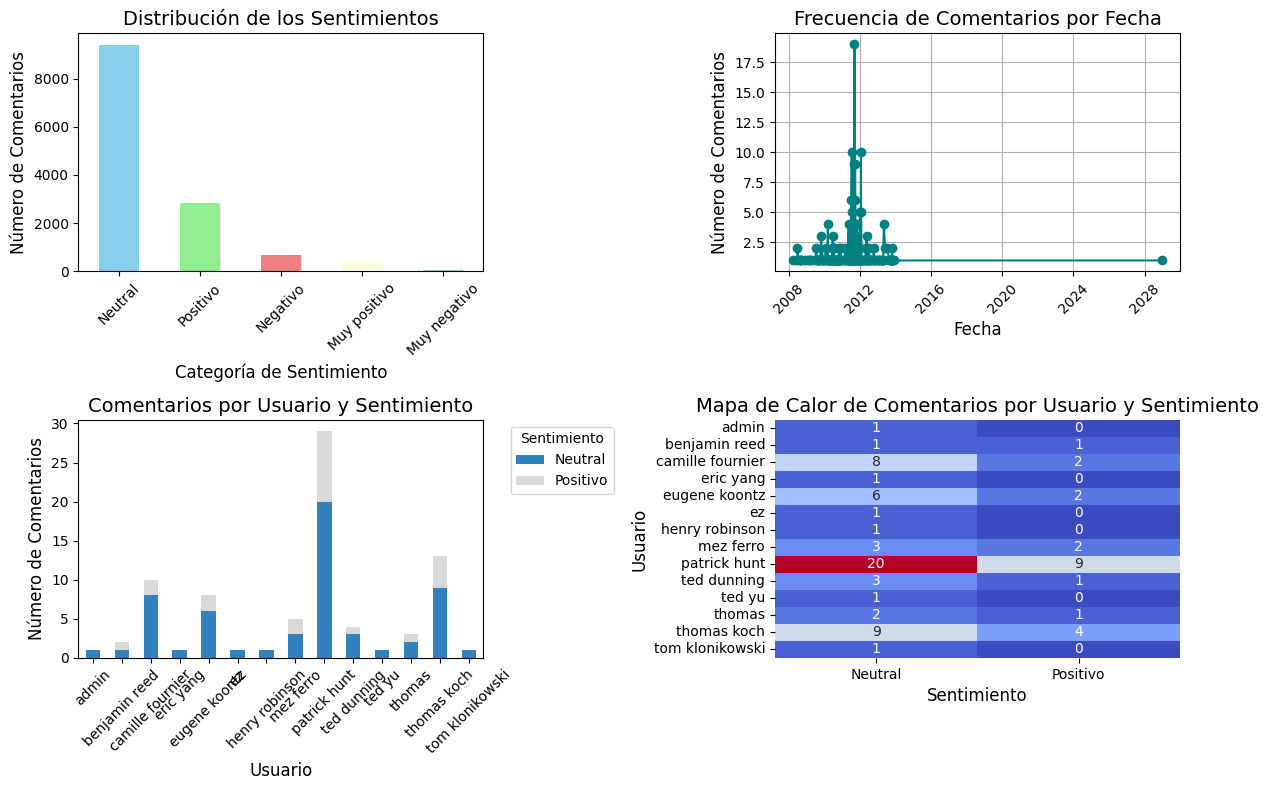

In [254]:
# --- VISUALIZAMOS LA INFORMACION HASTA AHORA ---

import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los subgráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# --- 1. DISTRIBUCIÓN DE LOS SENTIMIENTOS ---
sentiment_counts = df['Sentiment_category'].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'], ax=axes[0, 0])
axes[0, 0].set_title('Distribución de los Sentimientos', fontsize=14)
axes[0, 0].set_xlabel('Categoría de Sentimiento', fontsize=12)
axes[0, 0].set_ylabel('Número de Comentarios', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# --- 2. FRECUENCIA DE COMENTARIOS POR FECHA ---
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
comments_by_date = df.groupby(df['Date'].dt.date).size()
comments_by_date.plot(kind='line', color='teal', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('Frecuencia de Comentarios por Fecha', fontsize=14)
axes[0, 1].set_xlabel('Fecha', fontsize=12)
axes[0, 1].set_ylabel('Número de Comentarios', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True)

# --- 3. COMENTARIOS POR USUARIO Y SENTIMIENTO (BARRAS APILADAS) ---
user_comments = df.groupby('User')['Sentiment_category'].value_counts().unstack().fillna(0)
user_comments.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c', ax=axes[1, 0])
axes[1, 0].set_title('Comentarios por Usuario y Sentimiento', fontsize=14)
axes[1, 0].set_xlabel('Usuario', fontsize=12)
axes[1, 0].set_ylabel('Número de Comentarios', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Sentimiento', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- 4. MAPA DE CALOR DE COMENTARIOS POR USUARIO Y SENTIMIENTO ---
user_sentiment_matrix = pd.crosstab(df['User'], df['Sentiment_category'])
sns.heatmap(user_sentiment_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('Mapa de Calor de Comentarios por Usuario y Sentimiento', fontsize=14)
axes[1, 1].set_xlabel('Sentimiento', fontsize=12)
axes[1, 1].set_ylabel('Usuario', fontsize=12)

# Ajustar el layout para que no se sobrepongan los elementos
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()


In [256]:
#### APLICAMOS STANZA y LDA ###
!pip install stanza

import stanza
import pandas as pd


# Inicializar Stanza
stanza.download('en')  # Solo la primera vez
nlp = stanza.Pipeline('en', processors='tokenize,lemma')  # Reducir procesadores si es necesario

# Función para procesar con Stanza

def process_with_stanza(text):
    if not text or pd.isna(text):  # Manejar valores vacíos o nulos
        return ""
    doc = nlp(text)
    lemmatized_text = " ".join([word.lemma for sent in doc.sentences for word in sent.words])
    return lemmatized_text
'''
# Crear DataFrame de ejemplo (para verificar que estanza funciona)
df = pd.DataFrame({'Cleaned_Comment': ["This is a test.", "Stanza works well!", "Lemmatization is useful.", None]})

# Aplicar la función con Stanza
df['Lemmatized_Comment'] = df['Cleaned_Comment'].apply(process_with_stanza)

# Verificar los resultados
print(df)
'''
# Cargar el dataset desde el archivo Excel
file_path = '/content/sample_data/cleaned_comments_output.xlsx'  # Ruta del archivo
df = pd.read_excel(file_path)

# Verificar que las columnas existen
print("Columnas disponibles:", df.columns.tolist())

# Aplicar la lematización a la columna 'Cleaned_Comment'
df['Lemmatized_Comment'] = df['Cleaned_Comment'].apply(process_with_stanza)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


Columnas disponibles: ['Comment', 'Cleaned_Comment']


In [257]:
# Verificar los resultados (opcional)
print(df[['Cleaned_Comment', 'Lemmatized_Comment']].head())

# Exportar el DataFrame actualizado al mismo archivo
output_path = '/content/sample_data/cleaned_comments_output.xlsx'  # Archivo original
df.to_excel(output_path, index=False)
print(f"Archivo actualizado con éxito: {output_path}")

### SE PROCEDE A HACER EL ANÁLISIS DE SENTIMIENTO ####

In [260]:
#### SE PROCEDE A HACER EL ANÁLISIS DE SENTIMIENTO ####

# Se incluye en el pipeline de Stanza incluye el procesador sentiment
nlp = stanza.Pipeline('en', processors='tokenize,lemma,sentiment')


def analyze_sentiment_with_stanza(text):
    """
    Analiza el sentimiento del texto usando Stanza.
    Devuelve un puntaje promedio de sentimiento (0: Negativo, 1: Neutral, 2: Positivo).
    """
    if not text or pd.isna(text):  # Manejar valores vacíos
        return 0  # Neutral
    doc = nlp(text)
    sentiment_scores = [sentence.sentiment for sentence in doc.sentences]
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0
    return avg_sentiment

# Aplicar el análisis de sentimientos a la columna 'Lemmatized_Comment'
df['Sentiment_Score'] = df['Lemmatized_Comment'].apply(analyze_sentiment_with_stanza)

# Categorizar sentimientos
def categorize_sentiment(score):
    if score >= 1.5:
        return "Positive"
    elif score >= 0.5:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment_Category'] = df['Sentiment_Score'].apply(categorize_sentiment)

# Verificar los resultados
print(df[['Lemmatized_Comment', 'Sentiment_Score', 'Sentiment_Category']].head())

df.to_excel('/content/sample_data/sentiment_analysis_output.xlsx', index=False)
print("Archivo con análisis de sentimientos exportado con éxito.")



INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| lemma     | combined_nocharlm |
| sentiment | sstplus_charlm    |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Loading: sentiment
INFO:stanza:Done loading processors!


Combinamos el resultado de sentiment_analysys_output.xlsx con el original de Kaggle para comparar resultados

In [263]:
import pandas as pd

# Leer los archivos
df1 = pd.read_excel('/content/sample_data/ZooKeeper_Project_Dataset.xlsx')
df2 = pd.read_excel('/content/sample_data/sentiment_analysis_output.xlsx')

# Ver los nombres de las columnas
print(df1.columns)
print(df2.columns)

# Concatenar los DataFrames
df_concatenado = pd.concat([df1, df2], axis=1)
print(df_concatenado.columns)

# Guardar el resultado
df_concatenado.to_excel('/content/sample_data/Análisis_final.xlsx', index=False)

Index(['Comment', 'Benchmark_results_of_politeness',
       'Benchmark_results_of_sentiment'],
      dtype='object')
Index(['Comment', 'Cleaned_Comment', 'Lemmatized_Comment', 'Sentiment_Score',
       'Sentiment_Category'],
      dtype='object')
Index(['Comment', 'Benchmark_results_of_politeness',
       'Benchmark_results_of_sentiment', 'Comment', 'Cleaned_Comment',
       'Lemmatized_Comment', 'Sentiment_Score', 'Sentiment_Category'],
      dtype='object')


### VISUALIZAMOS RESULTADOS STANZA ####

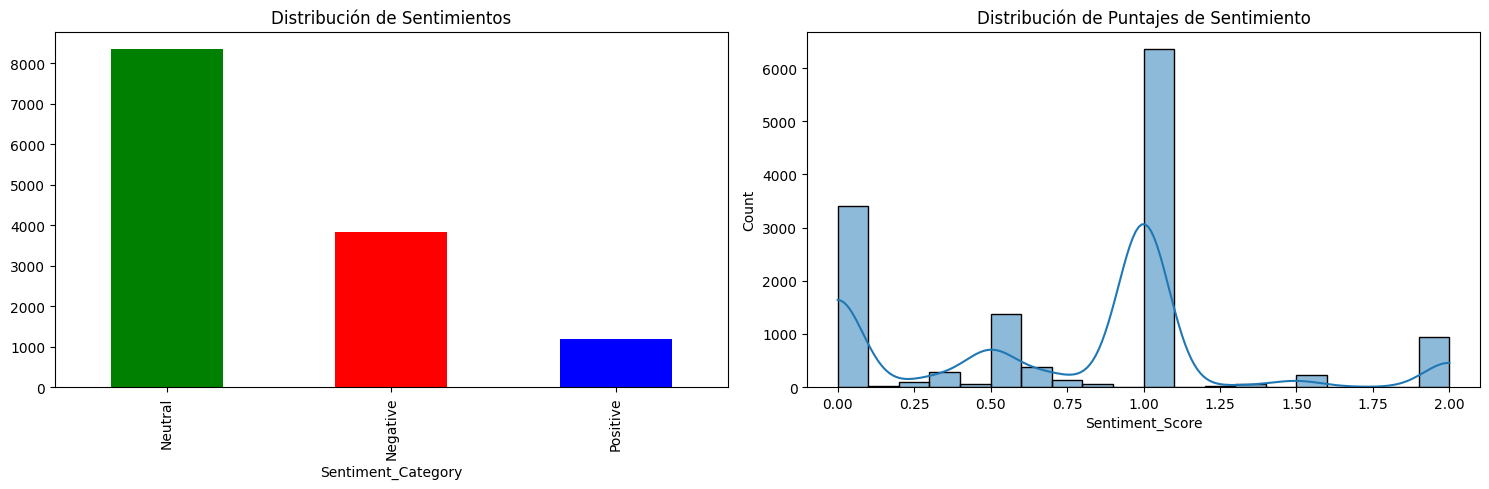

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (tu código para cargar los datos y crear los DataFrames) ...

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Gráfico 1: Distribución de Sentimientos
sentiment_counts = df_concatenado['Sentiment_Category'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], ax=axes[0])
axes[0].set_title('Distribución de Sentimientos')

# Gráfico 2: Histograma de Puntajes de Sentimiento
sns.histplot(df_concatenado['Sentiment_Score'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribución de Puntajes de Sentimiento')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()